In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load The Data

In [113]:
from sklearn import preprocessing, metrics
import utils
import scipy.io
import numpy as np
import tqdm
import itertools
from sklearn import datasets

iris_df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/iris/iris.data', header=None)
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Visualize The Data

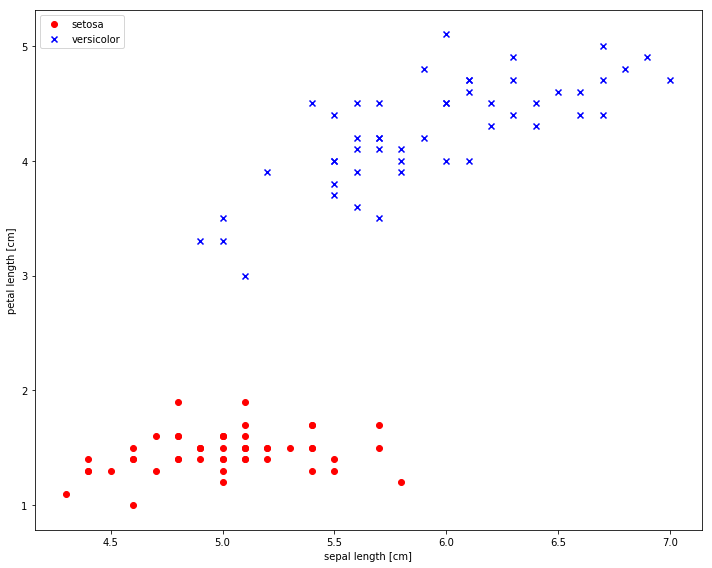

In [114]:
utils.plot_data(X)

# Split The Data Into Training, Validation, and Testing

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# KNN Implementation

In [ ]:
import statistics

class KNN(object):
    def __init__(self, k):
        self.X_train = None 
        self.y_train = None 
        self.k = k
    
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = np.zeros((X_test.shape[0]))
        ##################################################################################
        #  YOUR CODE HERE. The goal here is to iterate accross inputs, and predict each 
        #  input. For each input, we want to calculate the k closest training inputs 
        #  and find the most common label among them. Assign these predictions to the 
        #  variable 'predictions'.
        ##################################################################################
        for i in range(len(X_test)):
            dists = #use np.linalg.norm to find the distances between X_test[i] and each training example accross the 1st axis
            closest_k = #get the values of y_train at the indices of dists with the lowest values
            predictions[i] = #use statistics.mode on closest_k to find the most common label among the nearest neighbors
        ##################################################################################
        #  END OF YOUR CODE
        ##################################################################################
        return predictions 

# Training & Searching For The Best K

In [142]:
best_K = 0
best_val = 0
best_KNN = None

Ks = np.arange(1, 8, 2)

for K in tqdm.tqdm(itertools.product(Ks), unit="pair"):
    K = K[0]

    # set up the KNN and learn the parameters
    knn = KNN(k = K)
    knn.train(X_train,y_train)
    

    # calculate accuracy and update
    val_acc = np.mean(y_val == knn.predict(X_val))
    
    if val_acc >= best_val:
        best_K = K
        best_KNN = knn
        best_val = val_acc
    
print('Best K: %e, Best Val: %e' % (best_K, best_val))

4pair [00:00, 573.07pair/s]

Best K: 7.000000e+00, Best Val: 1.000000e+00


# Model Evaluation

In [143]:
##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################

print('Train Accuracy:', np.mean(y_train == best_KNN.predict(X_train)))

print('Test Accuracy:', np.mean(y_test == best_KNN.predict(X_test)))

Train Accuracy: 1.0
Test Accuracy: 1.0


# Plot Decision Boundary

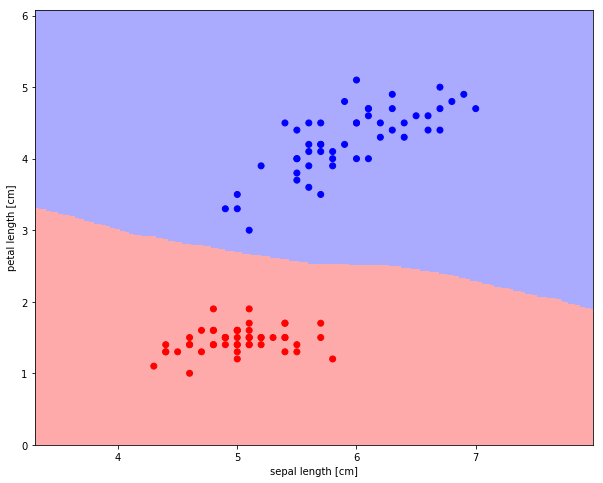

In [144]:
utils.plot_decision_boundary(X, y, best_KNN)